In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load data into dataframe
data = pd.read_csv('preprocessed_popular_spotify_songs.csv')

# sample subset of data
sample = data.sample(n=100)

sample_streams = data["streams"].values

sample_attributes = [
    sample["in_spotify_playlists"].values,
    sample["in_spotify_charts"].values,
    sample["in_apple_playlists"].values,
    sample["in_apple_charts"].values,
    sample["in_deezer_playlists"].values,
    sample["in_deezer_charts"].values,
    sample["in_shazam_charts"].values
]

song_attributes = [
    sample["danceability_%"].values,
    sample["valence_%"].values,
    sample["energy_%"].values,
    sample["acousticness_%"].values,
    sample["instrumentalness_%"].values,
    sample["liveness_%"].values,
    sample["speechiness_%"].values
]

all_attributes = ["danceability_%", "valence_%", "energy_%", "acousticness_%", 
                 "instrumentalness_%", "liveness_%", "speechiness_%"]

In [2]:
for idx in range(len(song_attributes)):
    attribute_arr = song_attributes[idx]

    # check data type and convert
    if isinstance(attribute_arr[0], str):
        attribute_arr = attribute_arr.astype(float)

    # percentile calculation
    Q1 = np.percentile(attribute_arr, 25, interpolation="midpoint")
    Q2 = np.percentile(attribute_arr, 50, interpolation="midpoint")
    Q3 = np.percentile(attribute_arr, 75, interpolation="midpoint")

    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    upp_lim = Q3 + 1.5 * IQR

    # identify outliers
    outliers = [val for val in attribute_arr if val < low_lim or val > upp_lim]

    print(f"Song Attribute: {all_attributes[idx]}\n")
    print(f"Q1: {Q1} \nQ2: {Q2} \nQ3: {Q3} \nIQR: {IQR} \n\nLower Limit: {low_lim} \nUpper Limit: {upp_lim} \n\n")
    print("Outliers in the dataset: ", outliers)
    print("_______________________________\n")

Song Attribute: danceability_%

Q1: 58.0 
Q2: 68.5 
Q3: 78.5 
IQR: 20.5 

Lower Limit: 27.25 
Upper Limit: 109.25 


Outliers in the dataset:  [27, 24]
_______________________________

Song Attribute: valence_%

Q1: 38.5 
Q2: 54.0 
Q3: 74.5 
IQR: 36.0 

Lower Limit: -15.5 
Upper Limit: 128.5 


Outliers in the dataset:  []
_______________________________

Song Attribute: energy_%

Q1: 54.0 
Q2: 63.0 
Q3: 77.0 
IQR: 23.0 

Lower Limit: 19.5 
Upper Limit: 111.5 


Outliers in the dataset:  [9]
_______________________________

Song Attribute: acousticness_%

Q1: 5.0 
Q2: 17.0 
Q3: 48.5 
IQR: 43.5 

Lower Limit: -60.25 
Upper Limit: 113.75 


Outliers in the dataset:  []
_______________________________

Song Attribute: instrumentalness_%

Q1: 0.0 
Q2: 0.0 
Q3: 0.0 
IQR: 0.0 

Lower Limit: 0.0 
Upper Limit: 0.0 


Outliers in the dataset:  [12, 1, 1, 11, 3]
_______________________________

Song Attribute: liveness_%

Q1: 10.0 
Q2: 11.5 
Q3: 28.5 
IQR: 18.5 

Lower Limit: -17.75 
Upper Limit

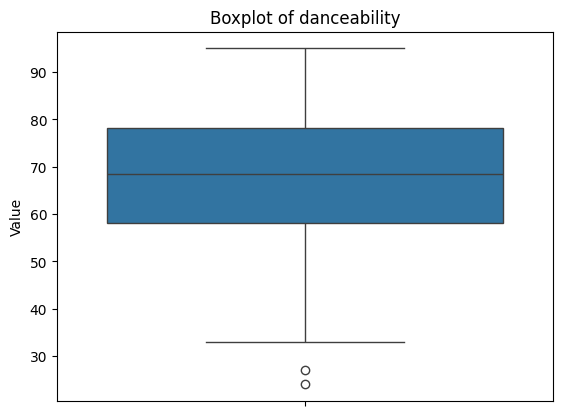

In [3]:
sns.boxplot(song_attributes[0])
plt.title(f'Boxplot of {"danceability"}')
plt.ylabel('Value')
plt.show()

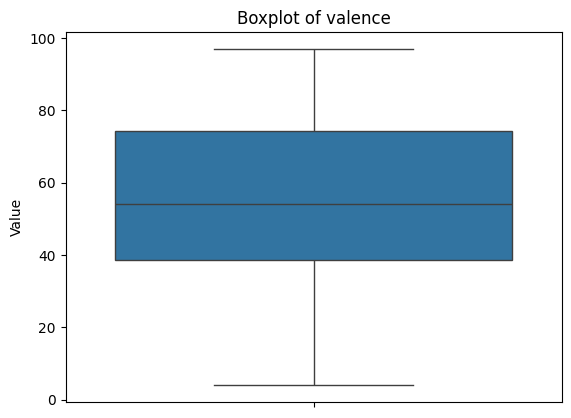

In [4]:
sns.boxplot(song_attributes[1])
plt.title(f'Boxplot of {"valence"}')
plt.ylabel('Value')
plt.show()

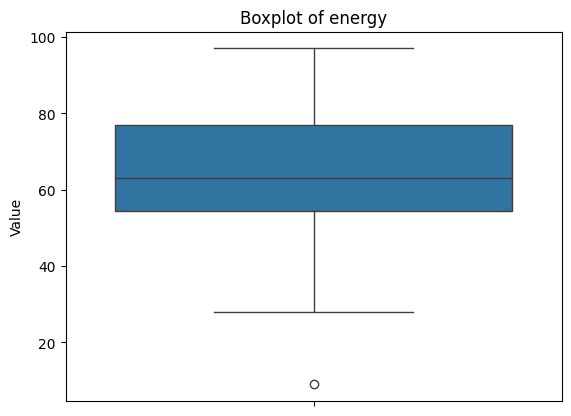

In [5]:
sns.boxplot(song_attributes[2])
plt.title(f'Boxplot of {"energy"}')
plt.ylabel('Value')
plt.show()

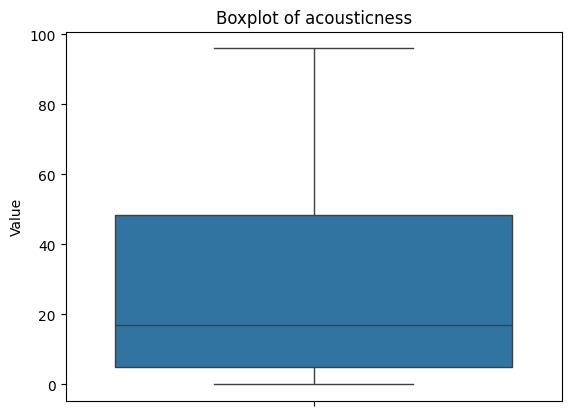

In [6]:
sns.boxplot(song_attributes[3])
plt.title(f'Boxplot of {"acousticness"}')
plt.ylabel('Value')
plt.show()

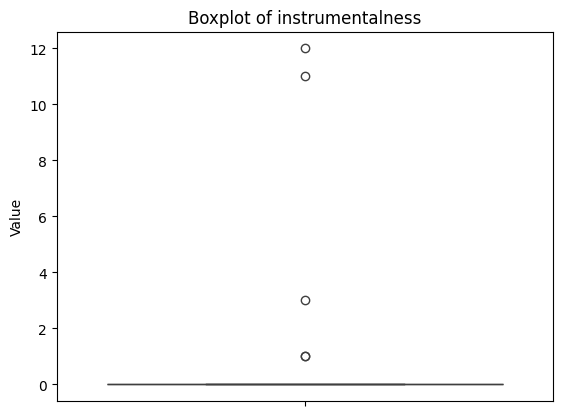

In [7]:
sns.boxplot(song_attributes[4])
plt.title(f'Boxplot of {"instrumentalness"}')
plt.ylabel('Value')
plt.show()

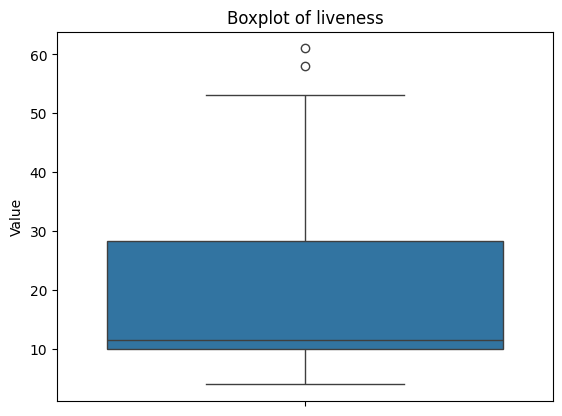

In [8]:
sns.boxplot(song_attributes[5])
plt.title(f'Boxplot of {"liveness"}')
plt.ylabel('Value')
plt.show()

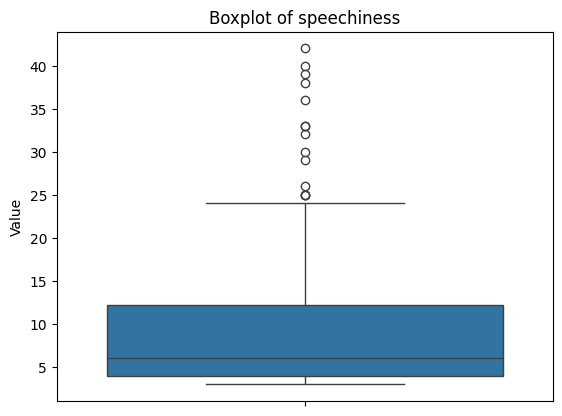

In [9]:
sns.boxplot(song_attributes[6])
plt.title(f'Boxplot of {"speechiness"}')
plt.ylabel('Value')
plt.show()